<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Logistic Regression

Um den Zusammenhang zwischen den Variablen in Bezug auf die Kündigungswahrscheinlichkeit zu ermitteln, wird im Folgenden anhand der Logistischen Regression getestet, ob dieser Algorithmus diesbezüglich Aussagen treffen kann. Bei einer Regression wird ermittelt, inwiefern sich die Ausprägung einer abhängigen Variablen auf die Ausprägung einer unabhhängigen Variablen zurückführen lässt.

### Initializations

Zunächst sind die für die Logistic Regression benötigten Bibliotheken zu importieren, eine Klasse für Textstyles zu definieren sowie die benötigten Datensets zu laden. 
Diese sind bereits in Trainings- und Testdaten unterteilt, sodass sich in X_train und y_train lediglich Trainingsdaten befinden, welche als Basis für die Modelle dienen. X_test und y_test wiederum werden für die Bewertung des Modells herangezogen. Um Ungenauigkeiten, die der Skalierung der Daten geschuldet sind, zu vermeiden, werden zusätzlich skalierte Datensets eingelesen (X_train_scaled und y_test_scaled). 


Im nächsten Schritt wird die Methode "plot_learning_curve" definiert. Diese generiert ein Diagramm, welches die Learning Curve der Trainings- und Testdaten abbildet. An dem Ergebnis kann abgelesen werden, ob beispielsweise ein Under- oder Overfitting vorliegt. 
Die rote Linie zeigt, inwiefern das Modell auf die Trainingsdaten angepasst werden kann und die grüne, wie gut dieses Modell für Testdaten geeignet ist. 
Auf der x-Achse wird angezeigt, wie viele Trainingsdaten herangezogen werden und auf der y-Achse wird entsprechend angezeigt, welchen Crossvalidation Score die zugeführten Trainings- bzw. die Testdaten erreichen.

In [1]:
# benötigte Bibliotheken importieren
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
%matplotlib inline

In [2]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
# Laden der Trainings- und Testdaten
X = np.load(file='exchange/hr_06_X.npy')
X_train = np.load(file='exchange/hr_06_X_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_test_scaled.npy')
y = np.load(file='exchange/hr_06_y.npy')
y_train = np.load(file='exchange/hr_06_y_train.npy')
y_test = np.load(file='exchange/hr_06_y_test.npy')
#df = np.load(file='exchange/hr_06_premodel.npy')

In [4]:
# Definition der Learning Curve-Methode
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## Use Logistic Regression

Nachdem die Trainings- und Testdaten sowie die benötigten Bibliotheken importiert und die Methode der Learning Curve definiert ist, wird die Logistische Regression initialisiert und das erste Modell erstellt. Mit Hilfe des Scores wird ein Einblick in die Qualität des Modells gewährt. Die anschließend generierte Confusion Matrix und der Classification Report werden ebenfalls zur Evaluation des Modells herangezogen. Die Confusion Matrix stellt dar, wie viele Datensätze richtig bzw. falsch einsortiert wurden. Der Classification Report enthält die Evaluationswerte Precision, Recall und F1-Score. Die einzelnen Werte zu Precision, Recall und F1-Score können voneinander abweichen. 


Um die Modelle der getesteten Algorithmen (Logistische Regression, Support Vector Machine, etc.) zu vergleichen, werden die Werte der Confusion Matrix in eine weitere Datei exportiert, um sie in einem weiteren Notebook wieder heranziehen zu können. 

Die Lernkurve eines Modells zeigt den Cross-Validation und Trainingsscore für eine steigende Anzahl von Trainingsproben. Sie wird eingesetzt, um herauszufinden, wie sehr vom Hinzufügen von Trainingsdaten profitiert werden kann und ob der Estimator mehr unter einem Varianz-Fehler oder einem Bias-Fehler leidet. Wenn bei einer großen Anzahl an Trainingsdaten der Trainingsscore wesentlich größer ist als der Cross-Validation-Score, leidet das Modell an High Variance und an Overfitting, weshalb vom Hinzufügen weiterer Trainingsproben höchstwahrscheinlich profitiert werden. Durch die Anreicherung mit Daten kann ein verallgemeinertes Modell generiert werden, welches wiederum besser mit unbekannten Daten umgehen kann. Wenn sich allerdings sowohl der Validierungswert als auch der Trainingswert mit zunehmender Größe des Trainingssatzes auf einen zu niedrigen Wert annähern, liegt ein High Bias und ein Underfitting vor. In diesem Fall hilft es nicht viel, mehr Trainingsdaten hinzuzufügen.

In [ ]:
# Logistische Regression initialisieren
logistic = LogisticRegression()
logistic.fit(X_train_scaled, y_train)

In [6]:
# Score berechnen
logistic.score(X_test_scaled, y_test)

0.79049999999999998

In [7]:
# Confusion Matrix erstellen
log_predictions = logistic.predict(X_test_scaled)

In [8]:
cm = confusion_matrix(y_test, log_predictions)
print(cm)

[[1418  118]
 [ 301  163]]


In [9]:
# Laden der Dictionary-Datei
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1844,    3],
       [  18,  535]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1738,  109],
       [ 352,  201]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1820,   27],
       [  18,  535]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1790,   57],
       [ 182,  371]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1831,   16],
       [  20,  533]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [10]:
# Aktualisieren der Werte der Confusion Matrix und exportieren der Ergebnisse
cm_dict.item().update({'logistic_regression':{'cm': cm, 'label': 'Logistic Regression' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1844,    3],
       [  18,  535]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1418,  118],
       [ 301,  163]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1820,   27],
       [  18,  535]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1790,   57],
       [ 182,  371]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1831,   16],
       [  20,  533]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [11]:
# Classification Report erstellen
print(classification_report(y_test, log_predictions))

             precision    recall  f1-score   support

          0       0.82      0.92      0.87      1536
          1       0.58      0.35      0.44       464

avg / total       0.77      0.79      0.77      2000



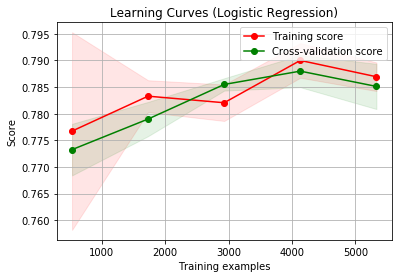

In [12]:
# Learning Curve berechnen
title = 'Learning Curves (Logistic Regression)'
estimator = logistic
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

Der Score von 79% ist relativ niedrig und die Learning Curve macht ebenfalls den Anschein als sei sie verbesserungswürdig. Der Trainingsscore sowie der Cross-Validation Score steigen nicht kontinuierlich und liegen stets bei ähnlichen Werten, weshalb die Vermutung naheliegt, dass es sich hier um ein High-Bias-Problem handelt und das Modell an Underfitting leidet. 

## Use Logistic Regression w/o Department

Um den Score zu verbessern, ist ein möglicher Ansatz, Features aus den Betrachtungen rauszunehmen, um die Anzahl der Kombinationen für den Algorithmus zu verringern und somit für mehr Klarheit zu sorgen. Im folgenden Abschnitt wird die Department-Spalte aus dem Datensatz rausgenommen und im Algorithmus somit vorerst nicht berücksichtigt. 
Die Wahl auf das Department Feature ist darin begründet, dass bereits im Notebook 'bi_visual' festgestellt wurde, dass es voraussichtlich keinen bedeutenden Unterschied macht, in welchem Department der Mitarbeiter gearbeitet hat - die Verteilung der Kündigung ist ähnlich.

Die Werte der Confusion Matrix werden wiederum in die Dictionary-Datei geschrieben, um diese aktuell zu halten und einen Überblick zu erlangen, welche Algorithmen sich für den Datensatz eher eignen. 

In [13]:
# Laden der Trainings- und Testdaten ohne das Feature Department
X = np.load(file='exchange/hr_06_X_wodept.npy')
X_train = np.load(file='exchange/hr_06_X_wodept_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_wodept_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_wodept_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_wodept_test_scaled.npy')
y = np.load(file='exchange/hr_06_y_wodept.npy')
y_train = np.load(file='exchange/hr_06_y_wodept_train.npy')
y_test = np.load(file='exchange/hr_06_y_wodept_test.npy')

In [14]:
#Logistische Regression initialisieren
logistic = LogisticRegression()
logistic.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
# Score berechnen
logistic.score(X_test_scaled, y_test)

0.78949999999999998

In [16]:
# Confusion Matrix und Classification Report erstellen
log_predictions = logistic.predict(X_test_scaled)

In [17]:
cm = confusion_matrix(y_test, log_predictions)
print(cm)

[[1421  115]
 [ 306  158]]


In [18]:
# Laden der Dictionary-Datei
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1844,    3],
       [  18,  535]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1418,  118],
       [ 301,  163]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1820,   27],
       [  18,  535]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1790,   57],
       [ 182,  371]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1831,   16],
       [  20,  533]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [19]:
# Aktualisieren der Werte der Confusion Matrix und exportieren der Ergebnisse
cm_dict.item().update({'logistic_regression':{'cm': cm, 'label': 'Logistic Regression' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1844,    3],
       [  18,  535]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1820,   27],
       [  18,  535]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1790,   57],
       [ 182,  371]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1831,   16],
       [  20,  533]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [20]:
# Classification Report erstellen
print(classification_report(y_test, log_predictions))

             precision    recall  f1-score   support

          0       0.82      0.93      0.87      1536
          1       0.58      0.34      0.43       464

avg / total       0.77      0.79      0.77      2000



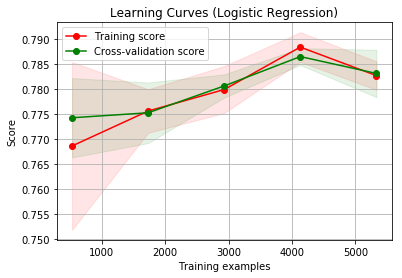

In [21]:
# Learning Curve berechnen
title = 'Learning Curves (Logistic Regression)'
estimator = logistic
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

Der Score des Modells, welches das Department nicht berücksichtigt ist nicht besser geworden, wie erhofft, sondern hat sich verschlechtert.  Auch die Learning Curve entspricht nicht einer 'Muster-Learning Curve'. Die Trainings- und Validierungskurve nähern sich beide einem schlechteren Wert an - wie zuvor -, weshalb es höchstwahrscheinlich nicht helfen würde, weitere Trainingsproben hinzuzufügen. Somit lässt sich dass Fazit ziehen, dass der Algorithmus der Logistischen Regression sich nicht für den gegebenen Datensatz und die Zielstellung eignet. Die Logistische Regression ist sinnvoll bei Datensätzen mit linearen Abhängigkeiten. Dies liegt bei den eingelesenen Daten offensichtlich nicht ausreichend vor, weshalb im Nachfolgenden weitere Modelle getestet werden. 